## NIM : 09011281722031
## NAMA : M. KHOIR SEPTIAWAN
## KELAS : SK 5A
## MATA KULIAH : ARTIFICIAL INTELLIGENCE

# <i><center>MUSHROOM_DATASET

### Meng-Import_Library
- Disini saya memasukkan beberapa library yang dibutuhkan.

In [1]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import sklearn
import keras
from keras.layers import Dense
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
scaler = MinMaxScaler
import numpy as np
np.random.seed(7)
import pandas as pd
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type

### Load_Dataset
- Disini saya memasukkan dataset mushroom.

In [2]:
data1 = pd.read_csv("mushroom_dataset.csv")

- Disini saya menampilkan coding data info(). data.info() ialah rincian peristiwa yang belum di proses.

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
cap-shape                   8416 non-null object
cap-surface                 8416 non-null object
cap-color                   8416 non-null object
bruises                     8416 non-null object
odor                        8416 non-null object
gill-attachment             8416 non-null object
gill-spacing                8416 non-null object
gill-size                   8416 non-null object
gill-color                  8416 non-null object
stalk-shape                 8416 non-null object
stalk-root                  8416 non-null object
stalk-surface-above-ring    8416 non-null object
stalk-surface-below-ring    8416 non-null object
stalk-color-above-ring      8416 non-null object
stalk-color-below-ring      8416 non-null object
veil-type                   8416 non-null object
veil-color                  8416 non-null object
ring-number                 8416 non-null object
ring-type  

- Encoder disini fungsinya ialah untuk merubah fitur kategori string menjadi numerikal. 
- Menampilkan dataset head(), 
- head() merupakan fungsi dasar untuk series yang berfungsi untuk menampilkan n data pertama saja.

In [4]:
enc = LabelEncoder()
dataset = data1.apply(enc.fit_transform)
dataset.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
0,2,3,8,0,0,1,1,1,10,1,...,7,7,0,2,1,4,6,4,6,0
1,2,3,8,0,0,1,1,1,10,1,...,7,7,0,2,1,4,1,4,6,0
2,2,3,8,0,0,1,1,1,7,1,...,7,7,0,2,1,4,6,4,6,0
3,2,3,8,0,0,1,1,1,7,1,...,7,7,0,2,1,4,1,4,6,0
4,2,3,8,0,0,1,1,1,1,1,...,7,7,0,2,1,4,6,4,6,0


### Menetapkan_Data
- Disini saya menampilkan coding dataset values. values berfungsi untuk mengubah deret menjadi ndarray (n dimensional array).
- Data_raw ialah sebuah kondisi untuk sebuah data didalam sebuah sistem komputer yang dikoleksi dari sebuah sumber langsung tanpa perubahan apapun.

In [5]:
data_raw = dataset.iloc[:,0:22].values
target = dataset.iloc[:,22].values

- Disini saya menampilkan coding dataframe, 
- dataframe yaitu sebuah koleksi kolom berurutan dengan nama dan jenis.

In [6]:
data=pd.DataFrame(data_raw)
data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2,3,8,0,0,1,1,1,10,1,...,3,7,7,0,2,1,4,6,4,6
1,2,3,8,0,0,1,1,1,10,1,...,3,7,7,0,2,1,4,1,4,6
2,2,3,8,0,0,1,1,1,7,1,...,3,7,7,0,2,1,4,6,4,6
3,2,3,8,0,0,1,1,1,7,1,...,3,7,7,0,2,1,4,1,4,6
4,2,3,8,0,0,1,1,1,1,1,...,3,7,7,0,2,1,4,6,4,6
5,2,3,8,0,0,1,1,1,1,1,...,3,7,7,0,2,1,4,1,4,6
6,2,3,8,0,1,1,1,1,10,1,...,3,7,7,0,2,1,4,6,4,6
7,2,3,8,0,1,1,1,1,10,1,...,3,7,7,0,2,1,4,1,4,6
8,2,3,8,0,1,1,1,1,7,1,...,3,7,7,0,2,1,4,6,4,6
9,2,3,8,0,1,1,1,1,7,1,...,3,7,7,0,2,1,4,1,4,6


### Preprocessing_Data
- Preprocessing ini merupakan pen-skala-an nilai suatu atribut dari data sehingga bisa terletak pada range tertentu. Metode normalisasi yang digunakan pada data ini yaitu Min Max, Metode Min-Max merupakan metode normalisasi dengan melakukan suatu transformasi linier terhadap suatu data yang asli.
- Fitur scaling ialah suatu cara untuk membuat numerical data pada dataset yang memiliki rentang nilai (scale) yang sama.tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

In [7]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data_raw)

- Disini saya menampilkan coding dataframe head(). 
- Dataframe head() yaitu sebuah koleksi kolom berurutan dengan nama dan jenis untuk menampilkan n data pertama saja.

In [8]:
#Buat Variabel data_dataframe hanya untuk menampilkan, selanjutnya variabel data akan tetap dalam bentuk numpy array
data_dataframe = pd.DataFrame(data)
data_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.4,1.0,0.888889,0.0,0.0,1.0,1.0,1.0,0.909091,1.0,...,1.0,0.875,0.875,0.0,0.666667,0.5,1.0,0.750,0.8,1.0
1,0.4,1.0,0.888889,0.0,0.0,1.0,1.0,1.0,0.909091,1.0,...,1.0,0.875,0.875,0.0,0.666667,0.5,1.0,0.125,0.8,1.0
2,0.4,1.0,0.888889,0.0,0.0,1.0,1.0,1.0,0.636364,1.0,...,1.0,0.875,0.875,0.0,0.666667,0.5,1.0,0.750,0.8,1.0
3,0.4,1.0,0.888889,0.0,0.0,1.0,1.0,1.0,0.636364,1.0,...,1.0,0.875,0.875,0.0,0.666667,0.5,1.0,0.125,0.8,1.0
4,0.4,1.0,0.888889,0.0,0.0,1.0,1.0,1.0,0.090909,1.0,...,1.0,0.875,0.875,0.0,0.666667,0.5,1.0,0.750,0.8,1.0


In [9]:
classifications = 2

### Pembagian_atau_Split_Data 
- Data latih 80% dan data testing 20%

In [10]:
data_training, data_testing, target_training, target_testing = train_test_split(data_raw, target, test_size=0.2, random_state=42)

- Disini saya meng-copy-kan nilai aslinya sebelum di encoding-kan.

In [11]:
## mengcopy nilai asli sebelum di encoding
target_real=target_testing

- Disini saya meng-coding target training dan testing dari classifications.
- Training disini nantinya akan saya gunakan untuk membuat model machine learning. sedangkan,
- Testing disini akan saya gunakan untuk menguji performa dan kebenarannya (terhadap korelasi) dalam model yang saya gunakan ini.

In [12]:
target_training = keras.utils.to_categorical(target_training-1, classifications)
target_testing = keras.utils.to_categorical(target_testing-1, classifications)

### Model_ANN  
- Model ANN yang saya gunakan disini yaitu dengan hidden layer 1 dan node pada hidden layer 100, input layer 1 dan node input layer 22. 
- Fungsi aktivasinya yang saya gunakan yaitu Relu.

In [13]:
model = Sequential()
model.add(Dense(100, input_dim=22, activation='relu'))
model.add(Dense(classifications, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


- Disini saya menggunakan coding model compile (optimizer, loss, dan matrics).
- Fungsi compile() mengembalikan kode objek python dari source code. fungsi ini digunakan jika kita ingin mengubah kode dalam bentuk deretan string menjadi kode python (yang bisa dieksekusi python). objek kode yang dikembalikan tersebut nantinya bisa dieksekusi oleh fungsi exec() dan eval().

In [14]:
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['acc'])
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

### Proses_Test_Training_Data
- Disini saya menggunakan coding history validasi yaitu untuk menampilkan atau mengetahui hasil dari pengujian dan kebenarannya.

In [15]:
history_validasi = model.fit(data_training,target_training, validation_data=(data_testing,target_testing),batch_size=16, epochs=100)

Instructions for updating:
Use tf.cast instead.
Train on 6732 samples, validate on 1684 samples
Epoch 1/100
6732/6732 [==============================] - 7s 1ms/step - loss: 0.4668 - acc: 0.8035 - val_loss: 0.3737 - val_acc: 0.8409
Epoch 2/100
6732/6732 [==============================] - 6s 856us/step - loss: 0.3131 - acc: 0.8699 - val_loss: 0.2954 - val_acc: 0.8723
Epoch 3/100
6732/6732 [==============================] - 6s 924us/step - loss: 0.2544 - acc: 0.8914 - val_loss: 0.2456 - val_acc: 0.8961
Epoch 4/100
6732/6732 [==============================] - 5s 680us/step - loss: 0.2142 - acc: 0.9125 - val_loss: 0.2133 - val_acc: 0.9222
Epoch 5/100
6732/6732 [==============================] - 4s 603us/step - loss: 0.1842 - acc: 0.9297 - val_loss: 0.1817 - val_acc: 0.9293
Epoch 6/100
6732/6732 [==============================] - 4s 572us/step - loss: 0.1588 - acc: 0.9419 - val_loss: 0.1596 - val_acc: 0.9412
Epoch 7/100
6732/6732 [==============================] - 4s 639us/step - loss: 0.139

6732/6732 [==============================] - 3s 501us/step - loss: 6.4254e-04 - acc: 1.0000 - val_loss: 7.8973e-04 - val_acc: 1.0000
Epoch 59/100
6732/6732 [==============================] - 3s 519us/step - loss: 5.8859e-04 - acc: 1.0000 - val_loss: 7.1164e-04 - val_acc: 1.0000
Epoch 60/100
6732/6732 [==============================] - 4s 597us/step - loss: 5.3018e-04 - acc: 1.0000 - val_loss: 6.6995e-04 - val_acc: 1.0000
Epoch 61/100
6732/6732 [==============================] - 4s 526us/step - loss: 4.8521e-04 - acc: 1.0000 - val_loss: 5.9869e-04 - val_acc: 1.0000
Epoch 62/100
6732/6732 [==============================] - 3s 511us/step - loss: 4.4228e-04 - acc: 1.0000 - val_loss: 5.5877e-04 - val_acc: 1.0000
Epoch 63/100
6732/6732 [==============================] - 3s 520us/step - loss: 4.1773e-04 - acc: 1.0000 - val_loss: 5.7403e-04 - val_acc: 1.0000
Epoch 64/100
6732/6732 [==============================] - 3s 492us/step - loss: 3.5859e-04 - acc: 1.0000 - val_loss: 4.5504e-04 - val_acc

- Disini saya menggunakan coding scores guna untuk menampilkan scores dari akurasi data hasil dari pengujian dan kebenarannya.
- Scores disini ialah untuk menentukan peringkat/nilai (grade) dengan python.

In [16]:
scores = model.evaluate(data_testing, target_testing)
print("Akurasi data Testing = %.2f%%" % (scores[1]*100))

### Menampilkan_Model_Akurasi_Data
- Disini saya memasukkan beberapa plot untuk melihat model accuracy hasil dari pengujian dan kebenarannya melalui pemetaan dari input ke output.

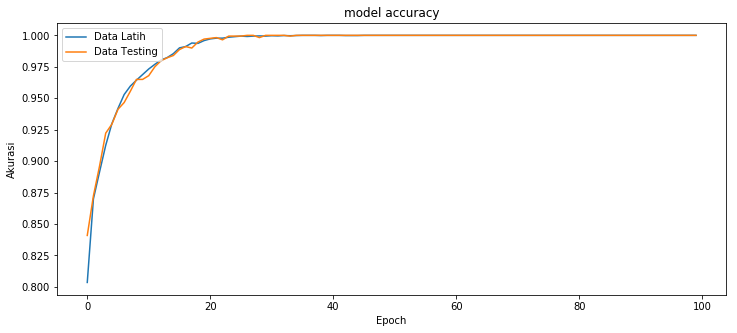

In [17]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
plt.plot(history_validasi.history['acc'])
plt.plot(history_validasi.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

### Menampilkan_Model_loss_Data
- Disini saya memasukkan codingan yang sama dengan coding menampilkan model akurasi hanya saja ada yang saya ubah sedikit didalam coding plot bagian label nya.
- Serta melihat hasil dari pengujian dan kebenarannya pemetaan dari input ke output.

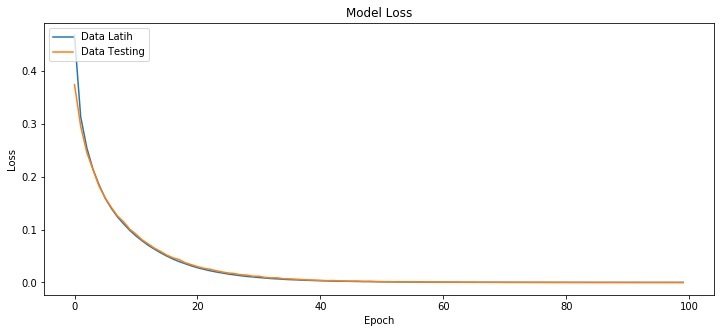

In [18]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
plt.plot(history_validasi.history['loss'])
plt.plot(history_validasi.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

### Confusion_Matrix
- Confusion Matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining atau sistem pendukung keputusan serta sebagai representasi hasil proses klasifikasi.

In [19]:
from sklearn.metrics import confusion_matrix
prediction = model.predict_classes(data_testing)+1
for i in range (len(prediction)):
    if(prediction[i]==3):
        prediction[i]=0
cm = confusion_matrix(target_real, prediction)
cm

array([[  0,   0, 903],
       [  0, 781,   0],
       [  0,   0,   0]], dtype=int64)

- Disini saya mencetaknya menggunakan coding berikut:

In [20]:
print(target_real)
print(prediction)

[1 1 0 ... 1 0 0]
[1 1 2 ... 1 2 2]


### Perhitungan 
- Disini saya membuat label 0 pada perhitungannya dan menampilkan Precesion, Recall, F1 Score, Spec, Sensitivity, Serta Akurasi pada perhitungan ini.
- keterangan coding : 
- tp(true positive), 
- tn(true negative), 
- fp(false positive), 
- fn(false negative.

In [21]:
#Label 0
tp = cm[0,0]
tn = cm[1,1] + cm[2,2]  
fp = cm[1,0] + cm[2,0]  
fn = cm[0,1] + cm[0,2] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  nan
recall :  0.0
F1 :  nan
spec :  1.0
sensitivity :  0.0
akurasi :  0.4637767220902613


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys


- Codingan pada label 1 dan menampilkan Precesion, Recall, F1 Score, Spec, Sensitivity, Serta Akurasi pada perhitungan ini yang berbeda dari label sebelumnya.
- keterangan coding : 
- tp(true positive), 
- tn(true negative), 
- fp(false positive), 
- fn(false negative.

In [22]:
#Label 1
tp = cm[1,1]
tn = cm[0,0] + cm[2,2] 
fp = cm[0,1] + cm[2,1] 
fn = cm[1,0] + cm[1,2] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  1.0
recall :  1.0
F1 :  1.0
spec :  nan
sensitivity :  1.0
akurasi :  1.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


- Codingan pada label 2 dan menampilkan Precesion, Recall, F1 Score, Spec, Sensitivity, Serta Akurasi pada perhitungan ini yang berbeda dari label sebelumnya.
- keterangan coding : 
- tp(true positive), 
- tn(true negative), 
- fp(false positive), 
- fn(false negative.

In [23]:
#Label 2
tp = cm[2,2]
tn = cm[0,0] + cm[1,1] 
fp = cm[0,2] + cm[1,2] 
fn = cm[2,0] + cm[2,1] 

precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.0
recall :  nan
F1 :  nan
spec :  0.4637767220902613
sensitivity :  nan
akurasi :  0.4637767220902613


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':


- Disini saya membuat coding sklearn.metrics untuk menampilkan hitungan dari confusion matrix.

In [24]:
from sklearn.metrics import classification_report
print(classification_report(target_real,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       903
           1       1.00      1.00      1.00       781
           2       0.00      0.00      0.00         0

    accuracy                           0.46      1684
   macro avg       0.33      0.33      0.33      1684
weighted avg       0.46      0.46      0.46      1684



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla